# Data Mining-1
## Clustering Techniques


In this session we will explore the concept of clustering, where one tries to find groups or clusters of data points.
![Clustering](kmeans_2.png "IRIS")










We are simply using the data features to determine some concept of closeness. One common technique to determine clustering is to look for clusters of points by using a metric, or distance measure. For example, one can use the [Euclidean metric](https://en.wikipedia.org/wiki/Euclidean_distance) when all the data have the same units (such as distance) and dimensions. Other distance measures can be used in other cases to determine closeness or similarity, such as [cosine similarity] (https://en.wikipedia.org/wiki/Cosine_similarity). Selection of an appropriate metric, especially for high dimensional data, is an important topic since we want to avoid the sparsing problem aka [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality).

For some algorithms, an initial estimate for the number of clusters is required, for example $k$ in k-means clustering. Other algorithms compute the local density and assign points to clusters based on this computed density, such as DBSCAN. In the following cells, we will examine both of these algorithms. First we use the Iris data set to find three clusters by using the k-means algorithm. Afterwards, we introduce the DBSCAN algorithm to compare its predictions. Finally, we use both of these algorithms on the other datasets including xclara,seeds, make_blobs, fish, movements and wholesale.

In [11]:
%matplotlib inline

In [12]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

In [17]:
import os
os.getcwd()

'C:\\Users\\dzfal'

## IRIS DATA
The four primary dimensions of the data include Sepal Length, Sepal Width, Petal Length, and Petal Width. The data set consists of 150 total measurements of three different types of Iris flowers, equally divided between three classes: Iris Setosa, Iris versicolor, and Iris virginica which can be seen from the following Iris picture ![Iris](iris.jpg "IRIS")




## K-Means Clustering

Cluster finding initially seekd to find $N$ clusters in a data set and to subsequently identify which data points belong to each cluster. While there are a number of different approaches to clustering, one of the easiest to understand is the k-means algorithm. In this algorithm 

Step 1 - Pick K random points as cluster centers called centroids.<br />
Step 2 - Assign each x_ix i to nearest cluster by calculating its distance to each centroid.<br />
Step 3 - Find new cluster center by taking the average of the assigned points.<br />
Step 4 - Repeat Step 2 and 3 until none of the cluster assignments change.<br />


This process is displayed in the following figures from [source](https://people.revoledu.com/kardi/tutorial/kMean/NumericalExample.htm) and Wikipedia. ![K-Means](kmeans.png "K-means Flow")

![K-means](kmeanss.jpg "Step by Step K-means")


[Sweet Visualization](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

We will manage k-means clustering with scikit-learn by using the KMeans object within the cluster module. This algorithm requires an initial estimate of the number of clusters to find as an input parameter. After the model is created, we fit the model to the data and subsequently obtain our model predictions. Note, this process is unsupervised in that we do not use the label array in this process.

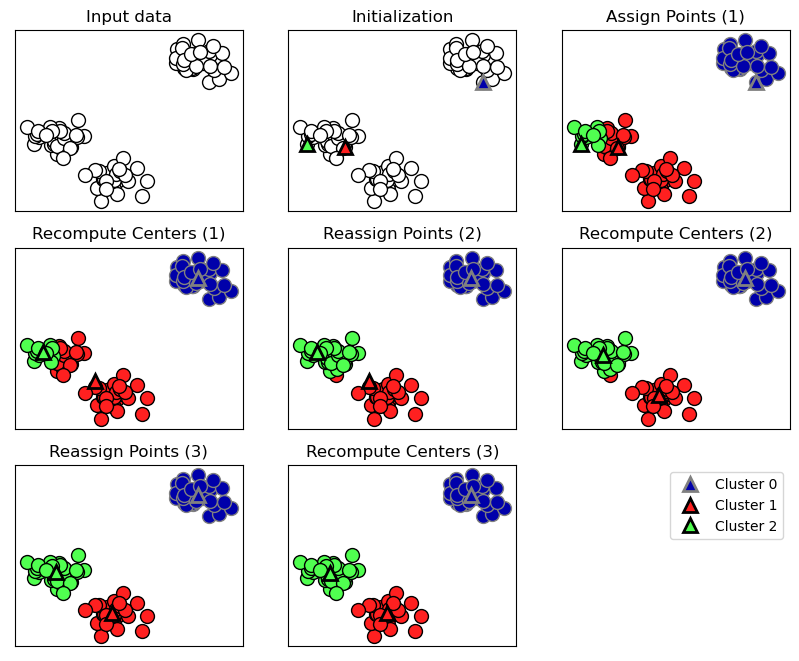

In [15]:
import mglearn
mglearn.plots.plot_kmeans_algorithm()
#mglearn.plots.plot_dbscan()

In [145]:
#import needed libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

#import the Iris dataset from Canvas with pandas
dataset = pd.read_csv('Iris.csv')

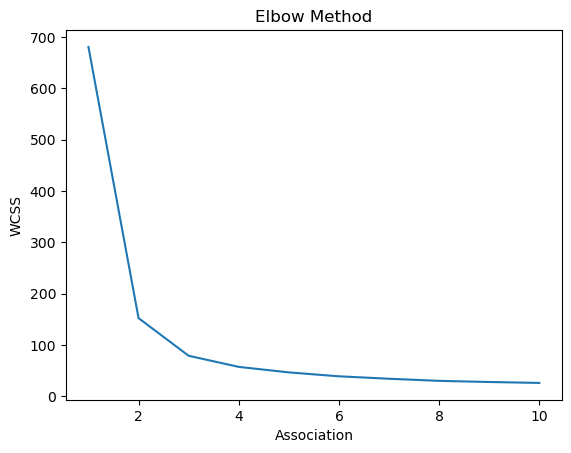

In [19]:
x = dataset.iloc[:, [1, 2, 3, 4]].values
#Let's select the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 400, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Association')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [20]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 500, 
                n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [100]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [21]:
## Alternatively
# We will use kmeans form scikit-learn
#from sklearn.cluster import KMeans

# We build our model assuming three clusters
#k_means = KMeans(n_clusters=3, n_init=10)

# We fit our data to assign classes
#k_means.fit(x)

# Obtain the predictions
#y_pred = k_means.predict(x)

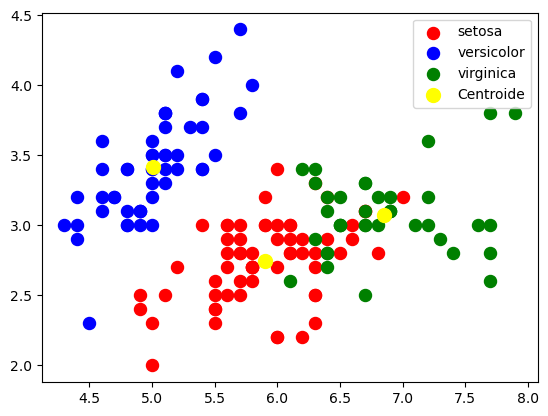

In [22]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 75, 
            c = 'red', label = 'setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 75, 
            c = 'blue', label = 'versicolor')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 75, 
            c = 'green', label = 'virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:,1], s = 100, 
            c = 'yellow', label = 'Centroide')

plt.legend()

In [23]:
kmeans.cluster_centers_[:, 0]

array([5.9016129, 5.006    , 6.85     ])

In [24]:
x[y_kmeans == 0, 0]

array([7. , 6.4, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1,
       5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 5.8, 4.9, 5.7, 5.8,
       6. , 5.6, 6.3, 6.2, 6.1, 6.3, 6. , 5.8, 6.3, 5.9])

In [25]:
x[y_kmeans == 0, 3]

array([1.4, 1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4,
       1.3, 1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 1.9, 1.7, 2. , 2.4,
       1.5, 2. , 1.8, 1.8, 1.8, 1.5, 1.8, 1.9, 1.9, 1.8])

#### Integration with principal components 

Just keep in mind for now how can we reduce the dimension from 4 to 2 with PCA, Truncated SVD etc

In [138]:
dataset = pd.read_csv('Iris.csv')

#pay attention that I only selected two features for visualization
x = dataset.iloc[:, [1, 2]].values

In [27]:


## Alternatively
# We will use kmeans form scikit-learn
               

# We build our model assuming three clusters
k_means = KMeans(n_clusters=3, n_init=10)

# We fit our data to assign classes
k_means.fit(x)

# Obtain the predictions
y_pred = k_means.predict(x)

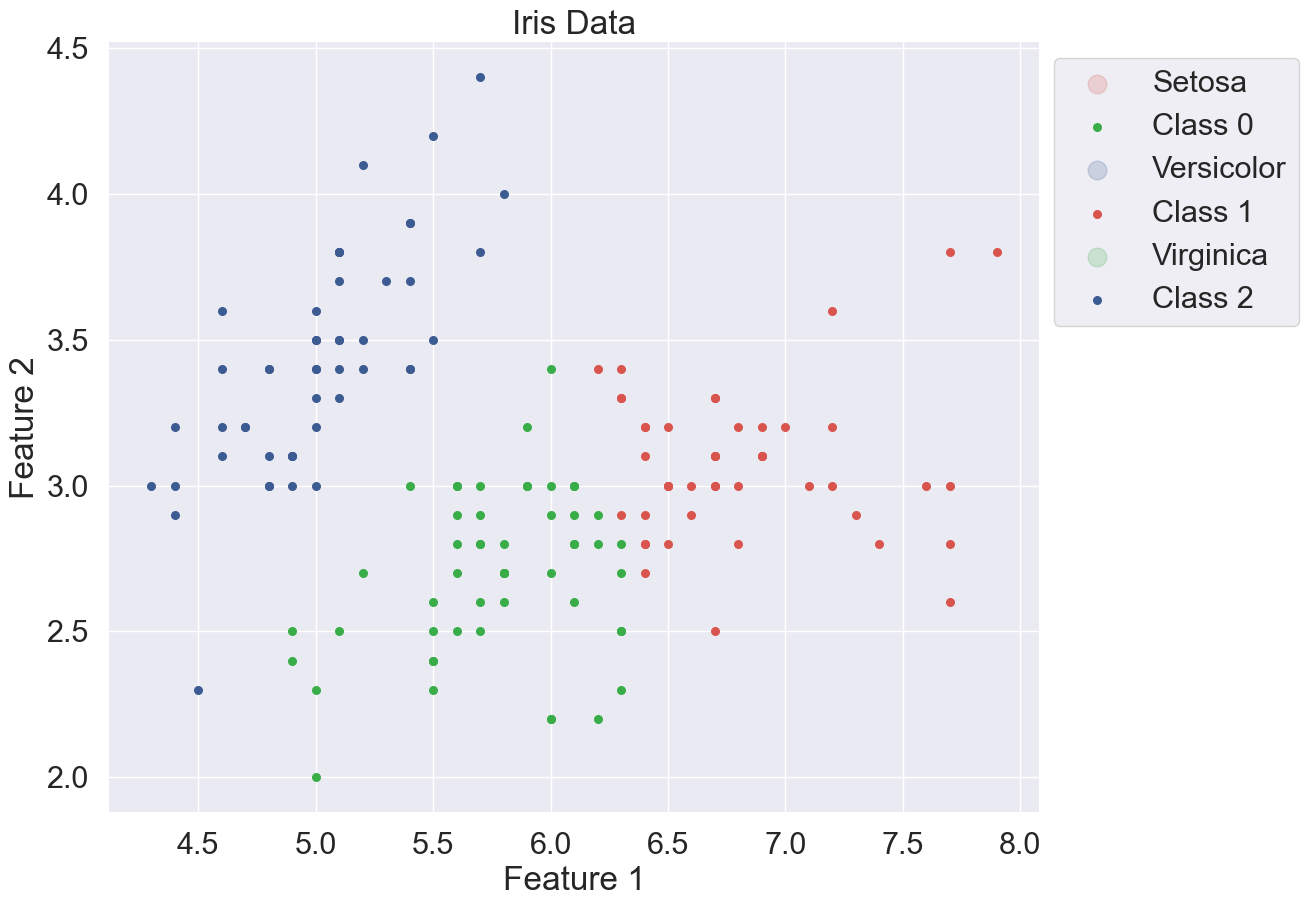

In [141]:

# Now we compare the cluster assignments to the real classes.

# Two sets of colors, can modify these to ensure colors match between known and predicted clusters.
clr = [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["denim blue"], sns.xkcd_rgb["medium green"]]
pclr = [sns.xkcd_rgb["medium green"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["denim blue"]]

# Label data
lbls = ['Setosa', 'Versicolor', 'Virginica']
plbls = ['Class 0', 'Class 1', 'Class 2']
cols = ['Feature1', 'Feature2', 'Species']

# Data
dt = pd.DataFrame(dataset, columns = cols)

# Predicted Clusters
pc = pd.DataFrame(np.concatenate((x, y_pred.reshape((150, 1))), axis=1), columns = cols)


# Now make the plot 
sns.set(font_scale=2.0)
fig, ax = plt.subplots(figsize=(12, 10))

for idx in range(3):
    
    tmp_df = dt[dt['Species'] == idx]
    ax.scatter(tmp_df['Feature1'], tmp_df['Feature2'], color=clr[idx], label=lbls[idx], alpha=0.2, s=180)

    tmp_pdf = pc[pc['Species'] == idx]
    ax.scatter(tmp_pdf['Feature1'], tmp_pdf['Feature2'], color=pclr[idx], label=plbls[idx], alpha=1, s=30)

#ax.set_xlim(-4.2, 4.6)
#ax.set_ylim(-1.8, 1.6)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Iris Data')
ax.legend(bbox_to_anchor=(1.0, 1), loc=2)

sns.despine(offset=5, trim=True)
sns.set(font_scale=1.0)

#### XClara Data Set

In [29]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [32]:
# Importing the dataset
data = pd.read_csv('xclara.csv')
print(data.shape)
data.head()

(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


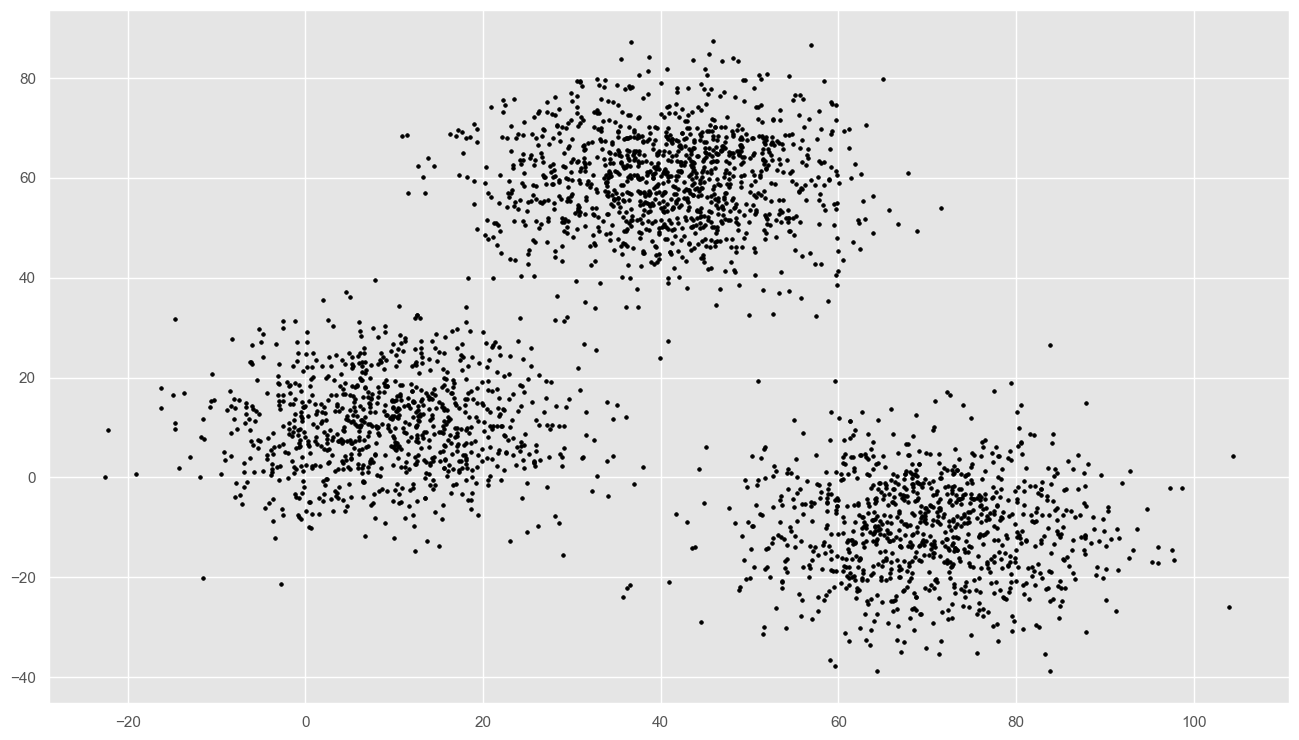

In [33]:
# Getting the values and plotting it
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

In [34]:
# Euclidean Distance Calculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [35]:
# Number of clusters
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[54. 45.]
 [18. 20.]
 [65. 37.]]


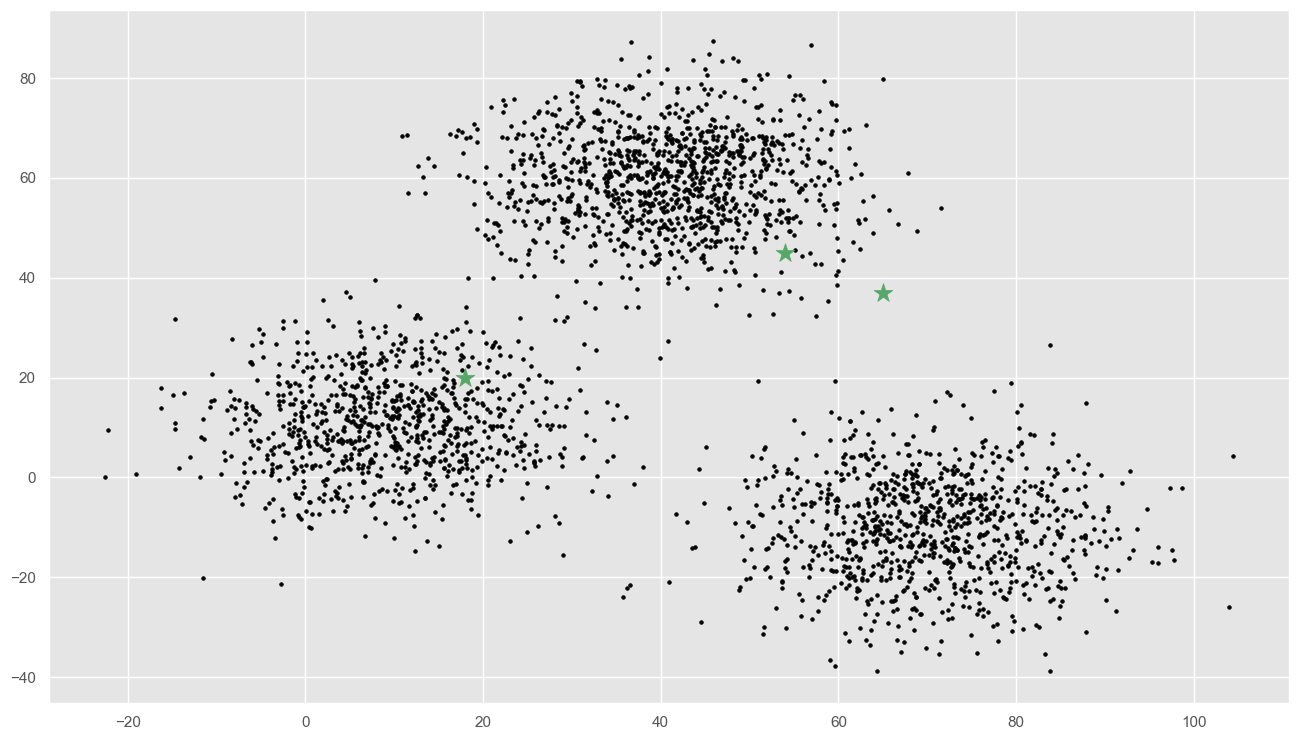

In [36]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [37]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

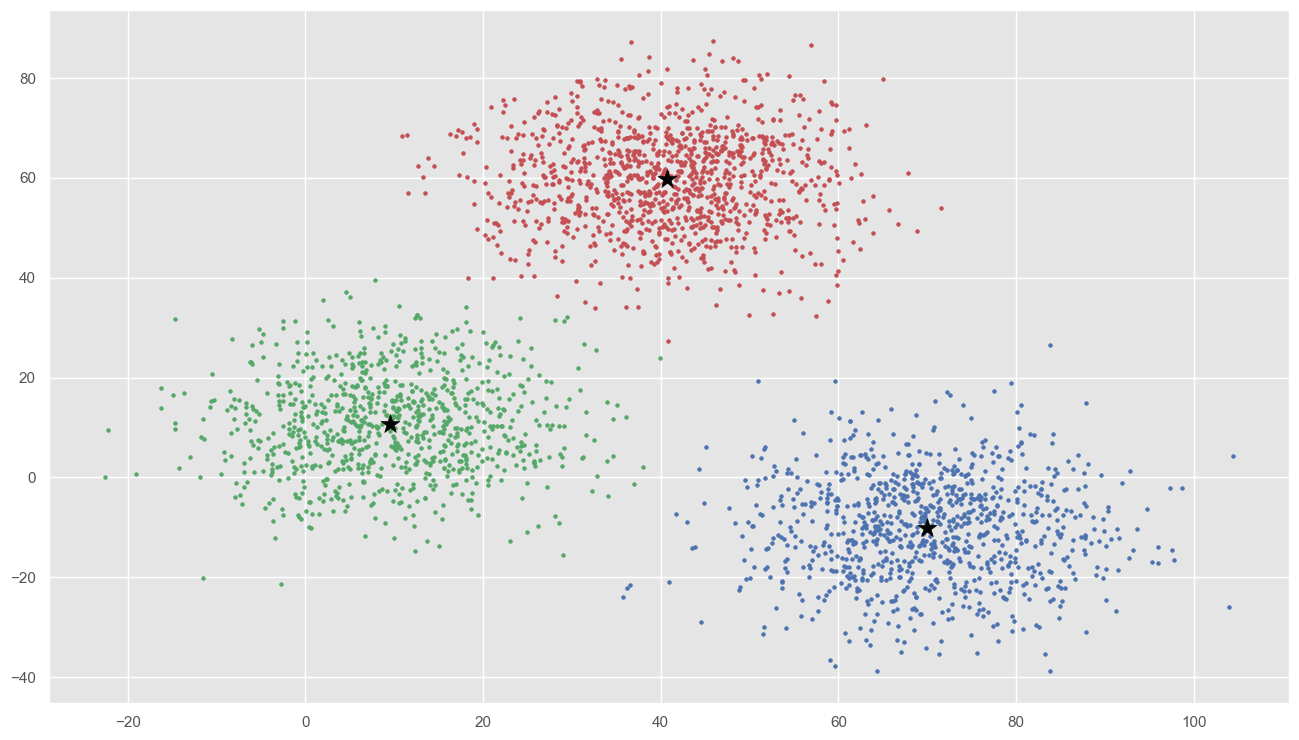

In [38]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

In [39]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

In [40]:
# Comparing with scikit-learn centroids
print(C) # From Scratch
print(centroids)

[[ 40.683628  59.715893]
 [  9.478045  10.686052]
 [ 69.92419  -10.119641]]
[[ 40.68362784  59.71589274]
 [  9.4780459   10.686052  ]
 [ 69.92418447 -10.11964119]]


#### Create a new data set with 4 clusters
[sklearn make_blobs](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)


In [41]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (16, 9)

# Creating a sample dataset with 4 clusters
X, y = make_blobs(n_samples=800, n_features=3, centers=4)

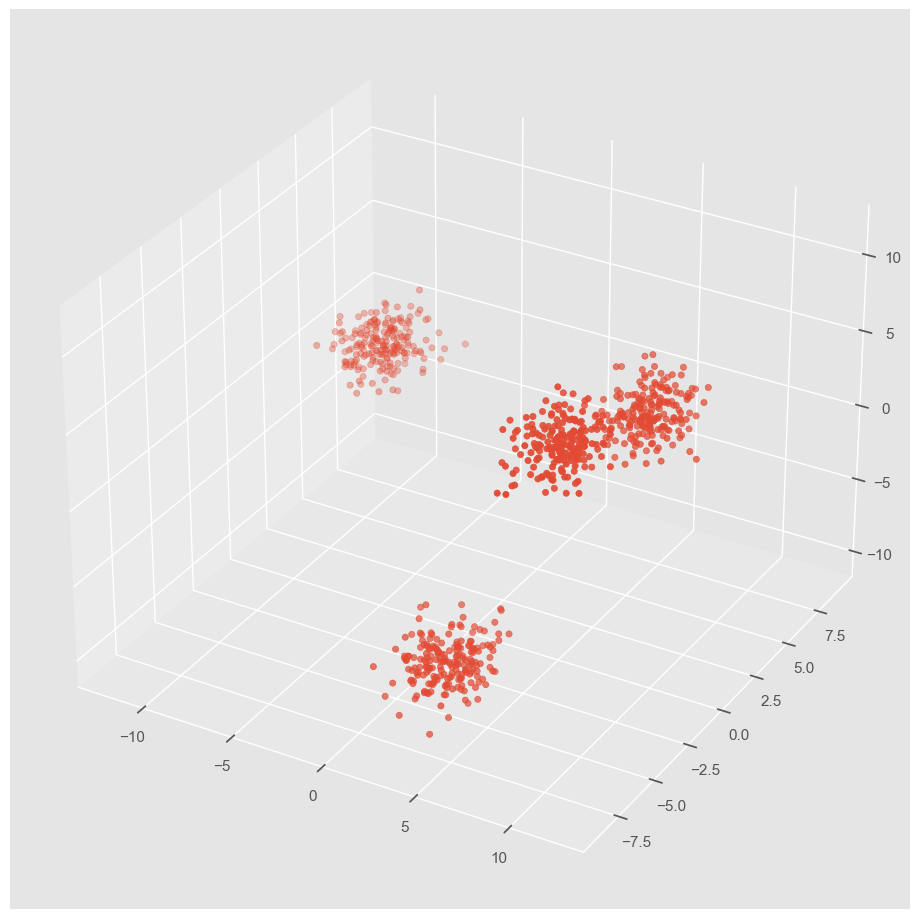

In [42]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

In [43]:
# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

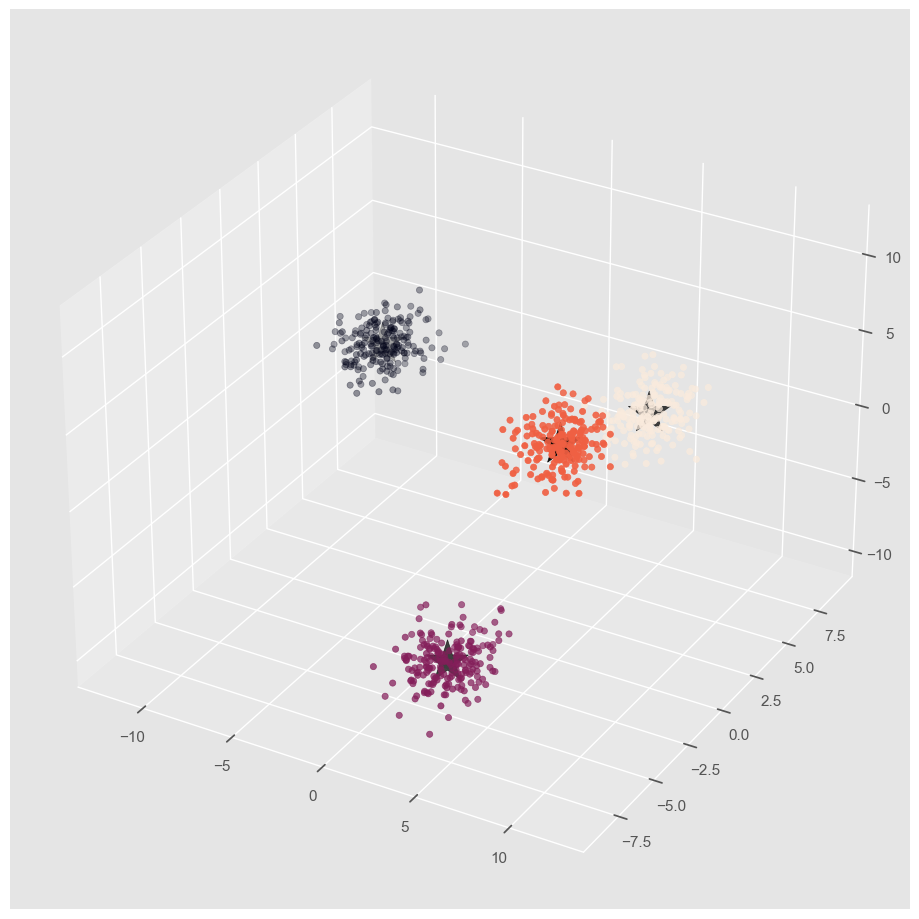

In [44]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)

#### Generate random datasets and cluster them

In [45]:
points=np.random.uniform(-2, 2, size=(300,2))
new_points=np.random.uniform(-2, 2, size=(300,2))

In [46]:
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)

[1 1 1 1 0 2 2 2 2 0 2 2 2 0 0 0 2 2 0 2 2 2 1 0 1 2 2 1 2 0 1 1 2 2 1 1 0
 0 2 0 2 2 0 1 0 1 2 0 0 0 1 1 0 0 1 2 0 0 2 1 2 1 1 1 0 1 2 1 0 2 2 0 2 2
 2 2 1 1 2 2 1 0 0 1 2 0 1 2 0 0 0 0 0 0 0 1 2 1 2 1 1 1 0 0 0 0 1 1 2 0 2
 0 0 0 2 2 2 0 2 2 0 2 0 1 0 2 1 0 0 0 1 1 1 2 1 2 1 1 0 0 1 2 0 1 0 0 1 2
 0 1 0 0 1 0 0 0 0 2 0 0 0 2 0 0 0 1 0 2 2 0 0 2 1 2 2 2 1 1 0 1 2 2 2 0 0
 1 1 2 0 1 2 0 2 0 2 2 0 2 2 0 1 1 2 0 1 1 0 1 2 0 1 2 0 0 0 2 0 1 2 0 0 1
 1 0 0 0 1 2 2 1 0 2 2 0 1 0 2 2 0 0 2 0 2 2 0 2 1 0 0 2 0 1 0 0 1 1 0 1 0
 0 0 0 2 1 0 1 0 1 2 1 1 2 0 2 0 2 0 0 2 1 2 2 2 0 1 1 1 2 0 0 0 0 0 0 0 2
 2 0 1 2]


[[-1.16865318  0.31477803]
 [ 1.02623816  0.9610883 ]
 [ 0.65610487 -1.2007423 ]]


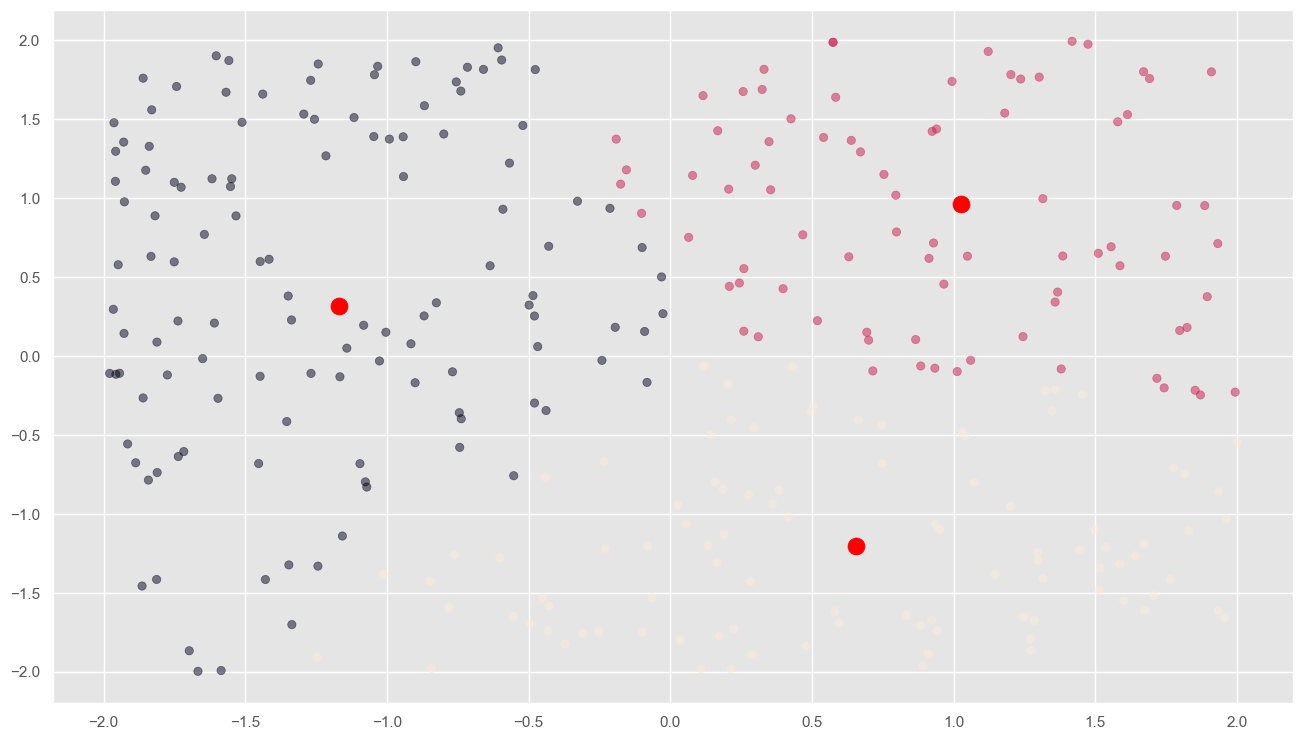

In [47]:
# Import pyplot
from matplotlib import pyplot as plt

# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_
print(centroids)
# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, s = 150, 
            c = 'red', label = 'centroid')

#### Seeds Data Set

In [49]:
seeds=pd.read_csv("seeds_dataset.csv", usecols=[0,1,2,3,4,5,6])

In [50]:
utku=pd.read_csv("seeds_dataset.csv", usecols=[7])

In [51]:
utku['1'].replace(1, 'Kama Wheat',inplace=True)
utku['1'].replace(2, 'Rosa Wheat',inplace=True)
utku['1'].replace(3, 'Canadian Wheat',inplace=True)

In [52]:
varieties=utku['1']

In [53]:
varieties.unique()

array(['Kama Wheat', 'Rosa Wheat', 'Canadian Wheat'], dtype=object)

In [54]:
samples=seeds.values

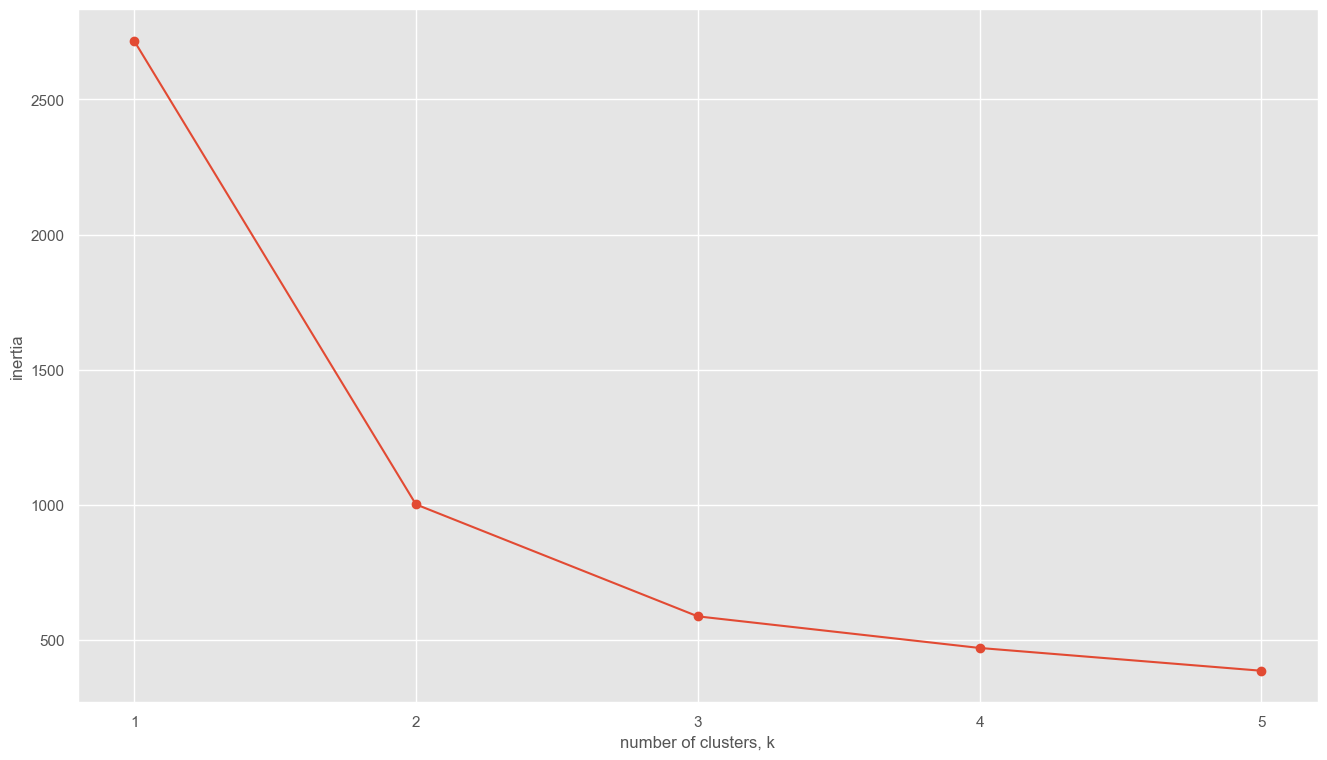

In [55]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [63]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with clusters and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'Varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['Varieties'])

# Display ct
print(ct)

Varieties  Canadian Wheat  Kama Wheat  Rosa Wheat
labels                                           
0                      68           9           0
1                       0           1          60
2                       2          59          10


In [64]:
fishes=pd.read_csv("fish.csv", header=None, index_col=False, skiprows=1, usecols=range(1,7))

In [65]:
list_species=['Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike']

In [66]:
species = pd.Series(list_species)
species=species.values

In [71]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)
# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

### Homework-1.1 (10 Points)

In [73]:
# Import pandas
import pandas as pd

# Fit the pipeline to fish data samples
pipeline.fit(fishes)

# Calculate the cluster labels: labels
labels = pipeline.fit_predict(fishes)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels, 'Varieties': list_species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['Varieties'])

# Display ct
print(ct)


Varieties  Bream  Pike  Roach  Smelt
labels                              
0              0    17      0      0
1              1     0     19      1
2             33     0      1      0
3              0     0      0     13


In [74]:
movements=pd.read_csv("movements.csv")
movements.head()

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [75]:
movements=pd.read_csv("movements.csv", header=None, index_col=False, skiprows=1, usecols=range(1,964))
movements.head()

,1,2,3,4,5,6,7,8,9,10,...,954,955,956,957,958,959,960,961,962,963
0,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [76]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(n_clusters=10))])

In [77]:
companies=pd.read_csv("movements.csv", header=None, index_col=False, skiprows=1, usecols=[0])
companies.head()

,0
0,Apple
1,AIG
2,Amazon
3,American express
4,Boeing


In [78]:
companies=companies[0].values

In [79]:
len(companies)

60

In [80]:
# Import pandas
import pandas as pd

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))



    labels                           companies
20       0                          Home Depot
56       0                            Wal-Mart
16       1                   General Electrics
52       1                            Unilever
19       1                     GlaxoSmithKline
46       1                      Sanofi-Aventis
54       1                            Walgreen
43       1                                 SAP
42       1                   Royal Dutch Shell
25       1                   Johnson & Johnson
6        1            British American Tobacco
39       1                              Pfizer
37       1                            Novartis
49       1                               Total
26       2                      JPMorgan Chase
36       2                    Northrop Grumman
30       2                          MasterCard
18       2                       Goldman Sachs
29       2                     Lookheed Martin
55       2                         Wells Fargo
5        2   

https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

### DBSCAN Algorithm

K-means worked well for the Iris and other data sets, especially since we knew there were labelled classes. While there are automated methods for determining $k$ algorithmically, this requirement is still an impediment for some applications. An alternative, density-based clustering technique called DBSCAN (Density-Based Spatial Clustering of Applications with Noise) can be used instead. For example, k-means can create similar shaped (generally round) clusters, but in many cases, clusters have odd shapes. In these cases, a local density measurement can provide a more robust determination of cluster membership.

DBSCAN works by classifying points. A point is a core point if a minimum number of points are within a given distance. These two parameters are algorithmically eps (or $\epsilon$) and min_samples. eps is the maximum distance between two points for them to still be considered in the same density neighborhood. min_samples is the number of samples within a neighborhood for the current point to be considered a core point. A point is considered reachable from another point if there is a path consisting of core points between the starting and ending point. Any point that is not reachable is considered an outlier, anomaly, or in scikit learn terminology, noise.

DBSCAN is implemented in the popular Python machine learning library Scikit-Learn, and because this implementation is scalable and well-tested, I will be using it to demonstrate how DBSCAN works in practice.

The steps to the DBSCAN algorithm are:

Pick a point at random that has not been assigned to a cluster or been designated as an outlier. Compute its neighborhood to determine if it’s a core point. If yes, start a cluster around this point. If no, label the point as an outlier.

Once we find a core point and thus a cluster, expand the cluster by adding all directly-reachable points to the cluster. Perform “neighborhood jumps” to find all density-reachable points and add them to the cluster. If an an outlier is added, change that point’s status from outlier to border point.

Repeat these two steps until all points are either assigned to a cluster or designated as an outlier.


### HOMEWORK 1.2 (15) POINTS
### APPLY DBSCAN TO IRIS DATA SET

{0, 1, -1}
   Feature1  Feature2  Species
0       5.1       1.4      0.0
1       4.9       1.4      0.0
2       4.7       1.3      0.0
3       4.6       1.5      0.0
4       5.0       1.4      0.0


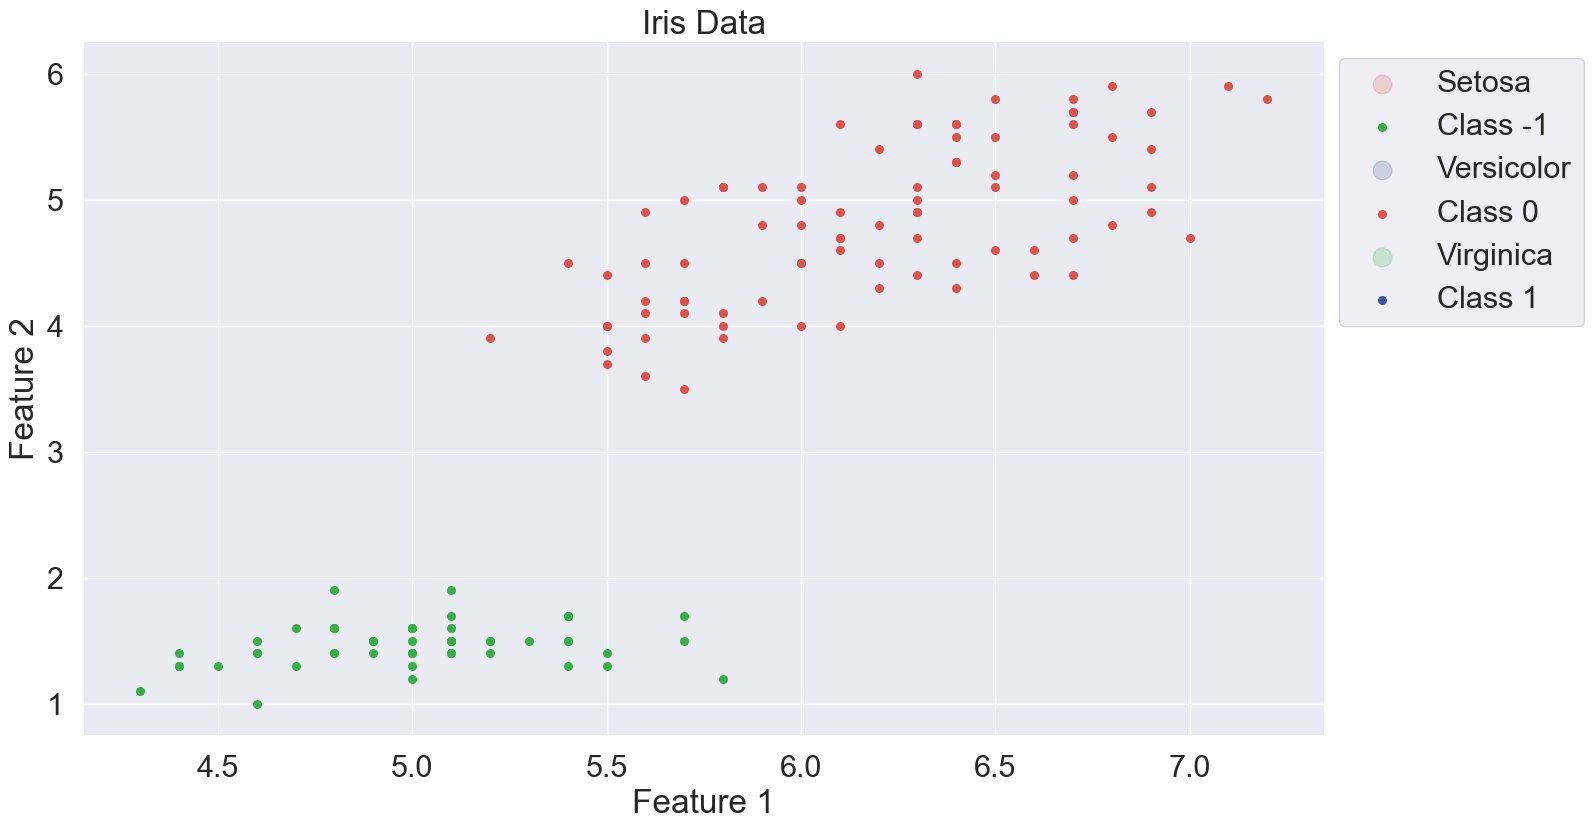

In [160]:
#your code here
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import DBSCAN

dataset1 = dataset.iloc[:, [1, 3]].values

dbsc = DBSCAN(eps = .5, metric='euclidean', min_samples = 15).fit(dataset1)
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

# Two sets of colors, can modify these to ensure colors match between known and predicted clusters.
clr = [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["denim blue"], sns.xkcd_rgb["medium green"]]
pclr = [sns.xkcd_rgb["medium green"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["denim blue"]]

# Label data
lbls = ['Setosa', 'Versicolor', 'Virginica']
plbls = ['Class -1', 'Class 0', 'Class 1']
cols = ['Feature1', 'Feature2', 'Species']

# Data
dt = pd.DataFrame(dataset, columns = cols)

# Predicted Clusters
pc = pd.DataFrame(np.concatenate((x, labels.reshape((150, 1))), axis=1), columns = cols)
dblbls = set(dbsc.labels_)
print(dblbls)
print(pc.head(5))
dbclrs = sns.hls_palette(len(dblbls))
dbcls = ['Class {0}'.format(idx) if idx >= -1 else 'Noise' for idx in dblbls]


# Now make the plot 
sns.set(font_scale=2.0)
fig, ax = plt.subplots(figsize=(16, 9))

for idx in range(3):
    
    tmp_df = dt[dt['Species'] == idx]
    ax.scatter(tmp_df['Feature1'], tmp_df['Feature2'], color=clr[idx], label=lbls[idx], alpha=0.2, s=180)

    tmp_pdf = pc[pc['Species'] == idx]
    ax.scatter(tmp_pdf['Feature1'], tmp_pdf['Feature2'], color=pclr[idx], label=plbls[idx], alpha=1, s=30)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Iris Data')
ax.legend(bbox_to_anchor=(1.0, 1), loc=2)

sns.despine(offset=5, trim=True)
sns.set(font_scale=1.0)

#should return somethink like below but not necessarily the same, take as a reference

In [128]:
import pandas as pd
 
data = pd.read_csv("wholesale.csv")
# Drop non-continuous variables
data.drop(["Channel", "Region"], axis = 1, inplace = True)


In [129]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


So we can visualize the data, I’m going to use only two of these attributes:

Groceries: The customer’s annual spending (in some monetary unit) on grocery products.

Milk: The customer’s annual spending (in some monetary unit) on milk products.

In [130]:
data = data[["Grocery", "Milk"]]
data = data.as_matrix().astype("float32", copy = False)

In [144]:
data[:,0]

array([-4.11149003e-02,  1.70318350e-01, -2.81571094e-02, -3.92976910e-01,
       -7.93561935e-02, -2.97637045e-01, -1.02848776e-01,  1.55358940e-01,
       -1.85336187e-01,  1.15142345e+00,  5.29133320e-01, -3.61161858e-01,
        4.00924921e-01,  7.40671933e-01,  4.36111122e-01, -4.35116082e-01,
        4.39271569e-01, -5.28665006e-01,  2.26258084e-01,  1.59362167e-01,
       -3.52839351e-01, -6.25901163e-01, -3.66850644e-01,  1.48200512e+00,
        6.15307927e-01, -3.75330746e-02, -5.36250055e-01, -5.16866028e-01,
        1.89686525e+00, -5.62797725e-01,  3.32448781e-01, -5.07595420e-01,
       -5.33616364e-01, -6.58716634e-02, -5.99353492e-01,  3.30763221e-01,
       -2.65821993e-01,  4.76775408e-01,  9.22607780e-01, -7.42626607e-01,
       -3.36510450e-01, -2.10198298e-01,  7.38459647e-01,  1.69048870e+00,
        2.65447497e-01,  1.43059540e+00,  1.47526288e+00,  5.01663828e+00,
        3.07270616e-01,  2.20911646e+00, -6.29061580e-01, -1.00636467e-01,
       -2.18626127e-01,  

In [131]:
from sklearn.preprocessing import StandardScaler
import numpy as np
stscaler = StandardScaler().fit(data)
data = stscaler.transform(data)


Text(0.5,1,'Wholesale Data - Groceries and Milk')

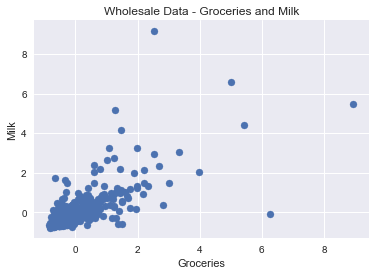

In [132]:
plt.scatter(data[:,0], data[:,1])
plt.xlabel("Groceries")
plt.ylabel("Milk")
plt.title("Wholesale Data - Groceries and Milk")

In [133]:
dbsc = DBSCAN(eps = .5, min_samples = 15).fit(data)
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

Text(0,0.5,'Milk (scaled)')

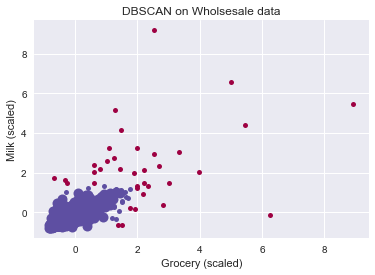

In [134]:
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))
for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    xy = data[class_member_mask & core_samples]
    plt.plot(xy[:,0],xy[:,1], 'o', markerfacecolor = color, markersize = 10)
    
    xy2 = data[class_member_mask & ~core_samples]
    plt.plot(xy2[:,0],xy2[:,1], 'o', markerfacecolor = color, markersize = 5)
plt.title("DBSCAN on Wholsesale data")
plt.xlabel("Grocery (scaled)")
plt.ylabel("Milk (scaled)")

#### Lets make moons
[sklearn make_moons](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html)

In [135]:
from sklearn.datasets import make_moons
# moons_X: Data, moon_y: Labels
moons_X, moon_y = make_moons(n_samples = 2000)

In [136]:
def add_noise(X,y, noise_level = 0.01):
    #The number of points we wish to make noisy
    amt_noise = int(noise_level*len(y))
    #Pick amt_noise points at random
    idx = np.random.choice(len(X), size = amt_noise)
    #Add random noise to these selected points
    noise = np.random.random((amt_noise, 2) ) -0.5
    X[idx,:] += noise
    return X   

In [137]:
moon_noise_X = add_noise(moons_X, moon_y)


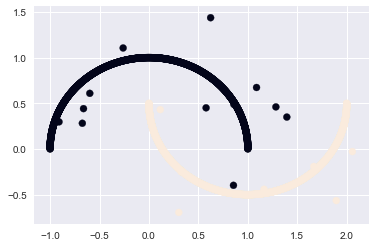

In [138]:
plt.scatter(moon_noise_X[:,0], moon_noise_X[:,1], c = moon_y)

In [139]:
dbsc = DBSCAN(eps = 0.05, min_samples = 10).fit(moon_noise_X)
#Get the cluster labels
labels = dbsc.labels_
#Identify the core and border points
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

In [140]:
unique_labels = np.unique(labels)
colors = ["red", "gold", "silver"]

Text(0.5,1,'DBSCAN on Half-moons')

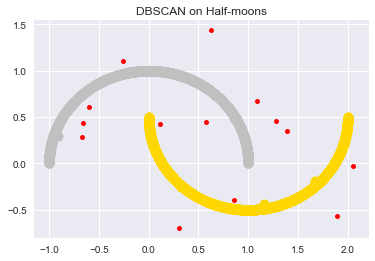

In [141]:
for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    xy = moon_noise_X[class_member_mask & core_samples]
    plt.plot(xy[:,0],xy[:,1], 'o', markerfacecolor = color, markersize = 10)
    
    xy2 = moon_noise_X[class_member_mask & ~core_samples]
    plt.plot(xy2[:,0],xy2[:,1], 'o', markerfacecolor = color, markersize = 5)
plt.title("DBSCAN on Half-moons")
#plt.savefig("results/dbscan_moons.png", format = "PNG")

In [142]:
from sklearn.cluster import KMeans
kmeans_moons = KMeans(n_clusters = 3).fit(moon_noise_X)
labels = kmeans_moons.labels_

Text(0.5,1,'K-Means with two clusters on Half Moons')

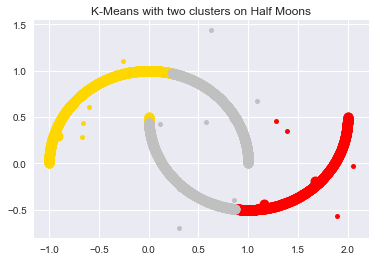

In [143]:

unique_labels = np.unique(labels)
colors = ["red", "gold", "silver"]


for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    xy = moon_noise_X[class_member_mask & core_samples]
    plt.plot(xy[:,0],xy[:,1], 'o', markerfacecolor = color, markersize = 10)
    
    xy2 = moon_noise_X[class_member_mask & ~core_samples]
    plt.plot(xy2[:,0],xy2[:,1], 'o', markerfacecolor = color, markersize = 5)
plt.title("K-Means with two clusters on Half Moons")
#plt.savefig("results/kmeans_moons.png", format = "PNG")

Advantages:
DBSCAN does not require one to specify the number of clusters in the data a priori, as opposed to k-means. DBSCAN can find arbitrarily shaped clusters. It can even find a cluster completely surrounded by (but not connected to) a different cluster. Due to the MinPts parameter, the different clusters being connected by a thin line of points is reduced. DBSCAN has a notion of noise. DBSCAN requires just two parameters and is mostly insensitive to the ordering of the points in the database. (However, points sitting on the edge of two different clusters might swap cluster membership if the ordering of the points is changed, and the cluster assignment is unique only up to isomorphism.) 


Disadvantages:
The quality of DBSCAN depends on the distance measure used in the function. The most common distance metric used is Euclidean distance. Especially for high-dimensional data, this metric can be rendered almost useless due to the so-called "Curse of dimensionality", making it difficult to find an appropriate value for epsilon. This effect, however, is also present in any other algorithm based on Euclidean distance. DBSCAN cannot cluster data sets well with large differences in densities, since the minPts-epsilon combination cannot then be chosen appropriately for all clusters.

### Homework -1.3 (25 Points)

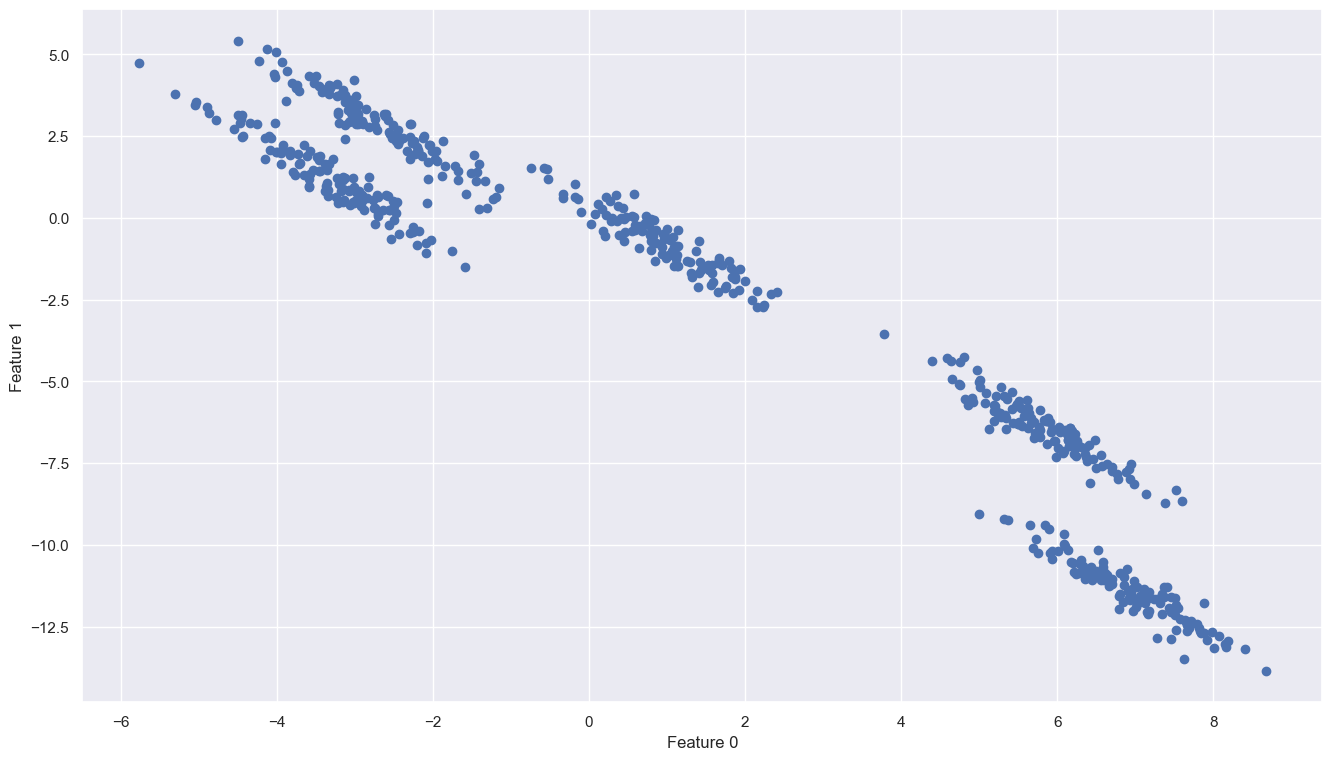

In [161]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600, centers = 5)
rng = np.random.RandomState(74)
# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)
# plot
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

1. Apply both k-means and DBSCAN for the randomly generated cluster data above.
2. Plot the results for both algorithms by highlighting clusters in different colors.
3. Interpret your results. If you observe a difference in the output of two algorithms, write up a paragraph contining your examination as why one algorithm performed better than the other.


**Question 1**

## k-means

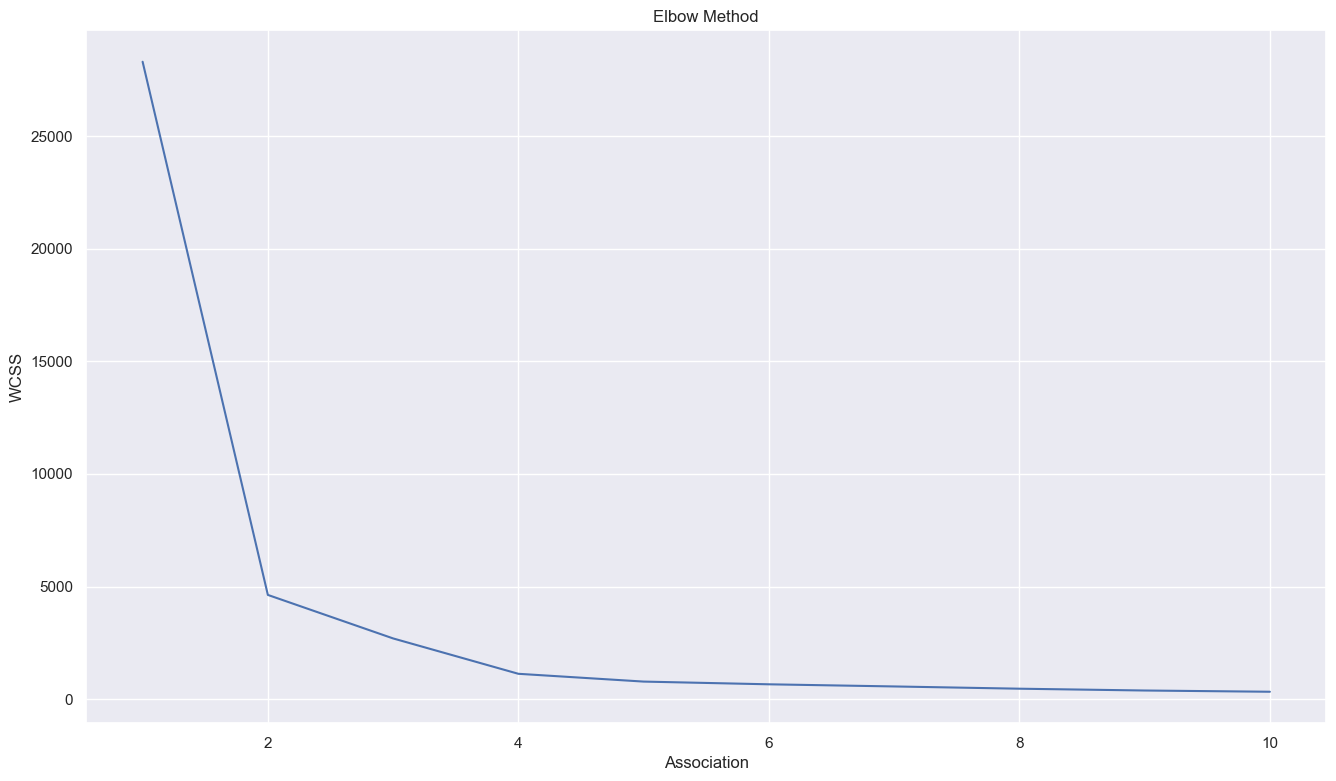

In [164]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 400, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Association')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

**By using the elbow moethod, we can select the most effective k in the k-means clustering. In this plot, we have k = 4 because after k=4, the inertia does not drop significantly.**

In [165]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 500, 
                n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

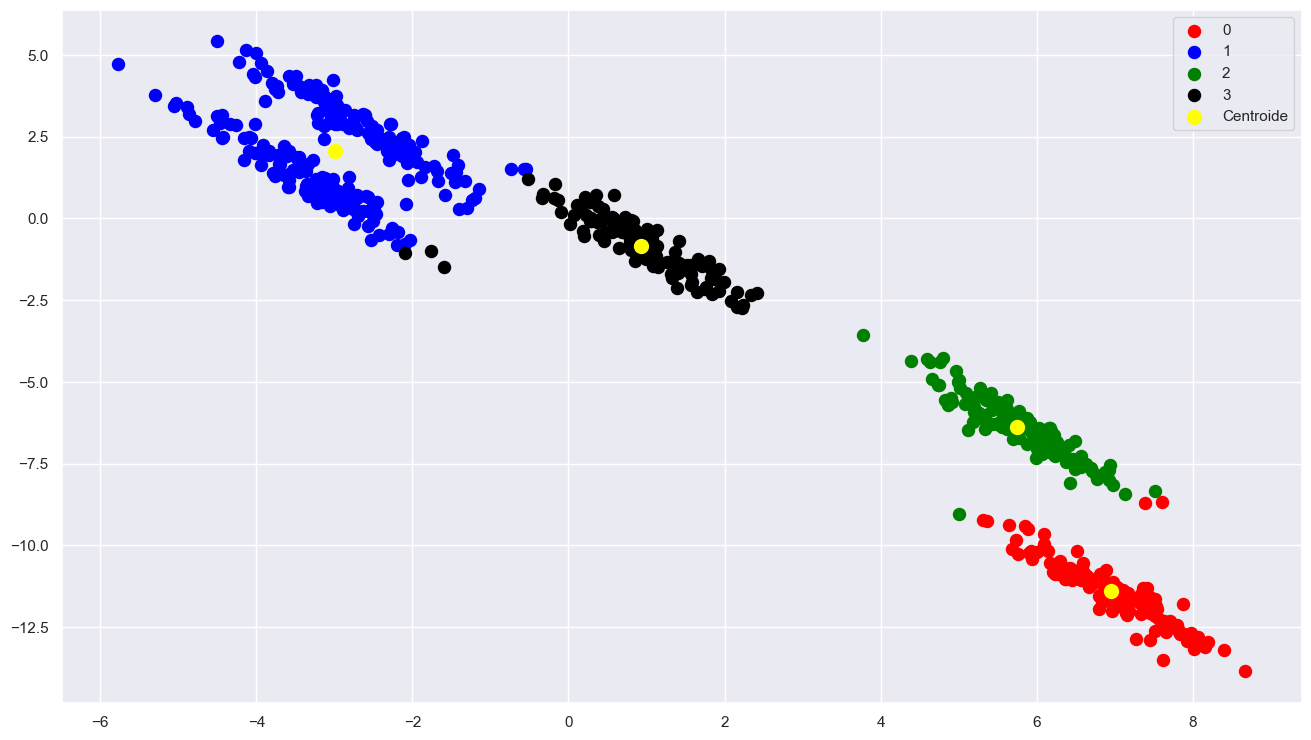

In [166]:
#Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 75, 
            c = 'red', label = '0')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 75, 
            c = 'blue', label = '1')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 75, 
            c = 'green', label = '2')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 75, 
            c = 'black', label = '3')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:,1], s = 100, 
            c = 'yellow', label = 'Centroide')

plt.legend()

## DBSCAN

In [167]:
dbsc = DBSCAN(eps = 0.5, min_samples = 15).fit(X)
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True
import numpy as np
stscaler = StandardScaler().fit(X)
data = stscaler.transform(X)
print(set(labels))

{0, 1, 2, 3, 4, -1}


Text(0, 0.5, 'Feature 1')

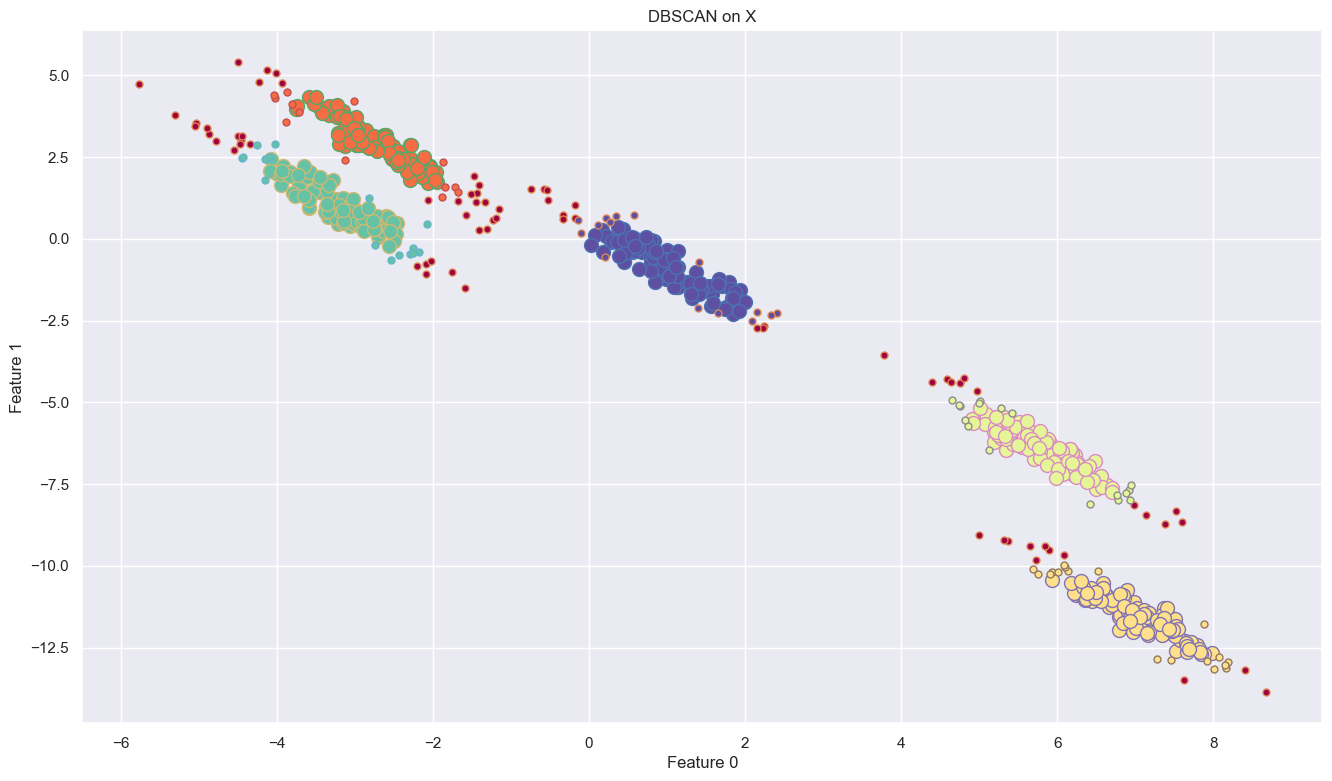

In [168]:
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))
for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    xy = X[class_member_mask & core_samples]
    plt.plot(xy[:,0],xy[:,1], 'o', markerfacecolor = color, markersize = 10)
    
    xy2 = X[class_member_mask & ~core_samples]
    plt.plot(xy2[:,0],xy2[:,1], 'o', markerfacecolor = color, markersize = 5)
plt.title("DBSCAN on X")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## Interpretation

**Apparently, these two algorithms have differences. k-means gives 4 clusters while dbscan gives 6 clusters. I think the reason that causes such difference is the theories behind these algorithms. For k-means, it adjusts the points that are closest to the centroid. For dbscan, it is more sensitive to the density of data point clusters, which results in the number of clusters is greater than that of the k-means.**